# 0. Datasets
* https://www.kaggle.com/datasets/leadbest/googlenewsvectorsnegative300
* https://www.kaggle.com/datasets/khulasasndh/game-of-thrones-books

# 1. Trained Model - Google News Vectors Negative 300

In [ ]:
import gensim
from gensim.models import KeyedVectors

In [ ]:
word_2_vec = KeyedVectors.load_word2vec_format(
	'./datasets/GoogleNews-vectors-negative300.bin',
	binary=True,
	limit=500000
)

In [ ]:
print("Features:", word_2_vec['cricket'].shape[0])
word_2_vec['cricket'][:10]

Features: 300


array([-0.3671875 , -0.12158203,  0.28515625,  0.08154297,  0.03198242,
       -0.03198242,  0.13476562, -0.2734375 ,  0.00946045, -0.10742188],
      dtype=float32)

In [ ]:
word_2_vec.most_similar('cricket')

[('cricketing', 0.8372225761413574),
 ('cricketers', 0.8165745735168457),
 ('Test_cricket', 0.8094819188117981),
 ('Twenty##_cricket', 0.8068488240242004),
 ('Twenty##', 0.7624265551567078),
 ('Cricket', 0.75413978099823),
 ('cricketer', 0.7372578382492065),
 ('twenty##', 0.7316356897354126),
 ('T##_cricket', 0.7304614186286926),
 ('West_Indies_cricket', 0.6987985968589783)]

In [ ]:
word_2_vec.similarity('man','woman')

0.76640123

In [ ]:
word_2_vec.doesnt_match(['PHP','java','monkey'])

'monkey'

In [ ]:
vec = word_2_vec['king'] - word_2_vec['man'] + word_2_vec['woman']
word_2_vec.most_similar([vec])

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.645466148853302),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676352500916),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376775860786438),
 ('queens', 0.5289887189865112),
 ('ruler', 0.5247419476509094)]

In [ ]:
vec = word_2_vec['INR'] - word_2_vec ['India'] + word_2_vec['England']
word_2_vec.most_similar([vec])

[('INR', 0.6442341208457947),
 ('GBP', 0.5040826797485352),
 ('England', 0.44649264216423035),
 ('£', 0.43340998888015747),
 ('Â_£', 0.4307197630405426),
 ('£_#.##m', 0.42561301589012146),
 ('Pounds_Sterling', 0.42512619495391846),
 ('GBP##', 0.42464491724967957),
 ('stg', 0.42324796319007874),
 ('£_#.###m', 0.4201711118221283)]

# 2. Traing Model - Game of Thrones Books

In [ ]:
import numpy as np
import pandas as pd
import gensim
import os

In [ ]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [ ]:
sent_tokenize("Hi. How are you? Hope you are fine")

['Hi.', 'How are you?', 'Hope you are fine']

In [ ]:
simple_preprocess('How are you?')

['how', 'are', 'you']

In [ ]:
data_url = "./datasets/game-of-thrones-books/"

story = []
for filename in os.listdir(data_url):
	print(filename)
	with open(os.path.join(data_url, filename)) as f:
		corpus = f.read()
		raw_sent = sent_tokenize(corpus)
		for sent in raw_sent:
			story.append(simple_preprocess(sent))

001ssb.txt
002ssb.txt
003ssb.txt
004ssb.txt
005ssb.txt


In [ ]:
print(story[:5])

[['game', 'of', 'thrones', 'book', 'one', 'of', 'song', 'of', 'ice', 'and', 'fire', 'by', 'george', 'martin', 'prologue', 'we', 'should', 'start', 'back', 'gared', 'urged', 'as', 'the', 'woods', 'began', 'to', 'grow', 'dark', 'around', 'them'], ['the', 'wildlings', 'are', 'dead'], ['do', 'the', 'dead', 'frighten', 'you'], ['ser', 'waymar', 'royce', 'asked', 'with', 'just', 'the', 'hint', 'of', 'smile'], ['gared', 'did', 'not', 'rise', 'to', 'the', 'bait']]


In [ ]:
model = gensim.models.Word2Vec(
    window=10,      # sliding side, words to take before and after target
    min_count=2,    # take sentences with atleast 2 words
)

In [ ]:
model.build_vocab(story)

In [ ]:
model.train(
    story,
    total_examples = len(story),
    epochs = 5,
)

(6569604, 8628190)

In [ ]:
model.wv.most_similar('king')

[('baratheon', 0.6996585726737976),
 ('realm', 0.6606312394142151),
 ('prince', 0.6487633585929871),
 ('throne', 0.6386960744857788),
 ('usurper', 0.6236034035682678),
 ('tourney', 0.6104148030281067),
 ('targaryen', 0.6072013974189758),
 ('battle', 0.586469292640686),
 ('council', 0.580899178981781),
 ('victory', 0.5770955085754395)]

In [ ]:
y = model.wv.index_to_key

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [ ]:
X = pca.fit_transform(model.wv.get_normed_vectors())

In [ ]:
X.shape

(17453, 3)

In [ ]:
import plotly.express as px
fig = px.scatter_3d(X[200:300],x=0,y=1,z=2, color=y[200:300])
fig.show()

# 3. Scratch

### Loading the Data

In [1]:
# For Google Colab

# from google.colab import drive
# drive.mount('/content/drive')
# data_url = "/content/drive/MyDrive/Temp/Datasets/game-of-thrones-books"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
data_url = "./datasets/game-of-thrones-books/"

corpus = ""
for filename in os.listdir(data_url):
	print(filename)
	with open(os.path.join(data_url, filename), 'r') as f:
		try:
			corpus += f.read()
		except: pass

len(corpus)

002ssb.txt
003ssb.txt
001ssb.txt
004ssb.txt
005ssb.txt


5714229

In [3]:
def show_corpus(corpus):
	print("Size:", len(corpus))
	return corpus[:1000]

In [4]:
show_corpus(corpus)

Size: 5714229


"A Clash of Kings \nBook Two of A song of Ice and Fire \nBy George R. R. Martin \nPROLOGUE \nThe comet's tail spread across the dawn, a red slash that bled above the crags of Dragonstone like a \nwound in the pink and purple sky. \nThe maester stood on the windswept balcony outside his chambers. It was here the ravens came, after \nlong flight. Their droppings speckled the gargoyles that rose twelve feet tall on either side of him, a \nhellhound and a wyvern, two of the thousand that brooded over the walls of the ancient fortress. When \nfirst he came to Dragonstone, the army of stone grotesques had made him uneasy, but as the years \npassed he had grown used to them. Now he thought of them as old friends. The three of them watched \nthe sky together with foreboding. \nThe maester did not believe in omens. And yet . . . old as he was, Cressen had never seen a comet half \nso bright, nor yet that color, that terrible color, the color of blood and flame and sunsets. He wondered if \nhis 

### Lowercase

In [5]:
corpus = corpus.lower()

In [6]:
show_corpus(corpus)

Size: 5714229


"a clash of kings \nbook two of a song of ice and fire \nby george r. r. martin \nprologue \nthe comet's tail spread across the dawn, a red slash that bled above the crags of dragonstone like a \nwound in the pink and purple sky. \nthe maester stood on the windswept balcony outside his chambers. it was here the ravens came, after \nlong flight. their droppings speckled the gargoyles that rose twelve feet tall on either side of him, a \nhellhound and a wyvern, two of the thousand that brooded over the walls of the ancient fortress. when \nfirst he came to dragonstone, the army of stone grotesques had made him uneasy, but as the years \npassed he had grown used to them. now he thought of them as old friends. the three of them watched \nthe sky together with foreboding. \nthe maester did not believe in omens. and yet . . . old as he was, cressen had never seen a comet half \nso bright, nor yet that color, that terrible color, the color of blood and flame and sunsets. he wondered if \nhis 

### Punctuations

In [7]:
import string
punc = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans("", "", punc))

corpus = remove_punc(corpus)

In [8]:
show_corpus(corpus)

Size: 5457910


'a clash of kings \nbook two of a song of ice and fire \nby george r r martin \nprologue \nthe comets tail spread across the dawn a red slash that bled above the crags of dragonstone like a \nwound in the pink and purple sky \nthe maester stood on the windswept balcony outside his chambers it was here the ravens came after \nlong flight their droppings speckled the gargoyles that rose twelve feet tall on either side of him a \nhellhound and a wyvern two of the thousand that brooded over the walls of the ancient fortress when \nfirst he came to dragonstone the army of stone grotesques had made him uneasy but as the years \npassed he had grown used to them now he thought of them as old friends the three of them watched \nthe sky together with foreboding \nthe maester did not believe in omens and yet    old as he was cressen had never seen a comet half \nso bright nor yet that color that terrible color the color of blood and flame and sunsets he wondered if \nhis gargoyles had ever seen i

### Stopwords

In [9]:
from gensim.parsing.preprocessing import remove_stopwords


corpus = remove_stopwords(corpus)

In [10]:
show_corpus(corpus)

Size: 3078448


'clash kings book song ice george r r martin prologue comets tail spread dawn red slash bled crags dragonstone like wound pink purple sky maester stood windswept balcony outside chambers ravens came long flight droppings speckled gargoyles rose feet tall hellhound wyvern thousand brooded walls ancient fortress came dragonstone army stone grotesques uneasy years passed grown thought old friends watched sky foreboding maester believe omens old cressen seen comet half bright color terrible color color blood flame sunsets wondered gargoyles seen like longer long gone stone tongues speak folly leaned battlement sea crashing beneath black stone rough beneath fingers talking gargoyles prophecies sky old man grown giddy child lifetimes hardwon wisdom fled health strength maester trained chained great citadel oldtown come superstition filled head ignorant fieldhand comet burned day pale grey steam rose hot vents dragonmont castle yestermorn white raven brought word citadel word longexpected fea

### Tokens (Splitting Words)

In [11]:
from gensim.utils import simple_preprocess

tokens = simple_preprocess(corpus)

In [12]:
print(len(tokens))
print(tokens[:200])

472262
['clash', 'kings', 'book', 'song', 'ice', 'george', 'martin', 'prologue', 'comets', 'tail', 'spread', 'dawn', 'red', 'slash', 'bled', 'crags', 'dragonstone', 'like', 'wound', 'pink', 'purple', 'sky', 'maester', 'stood', 'windswept', 'balcony', 'outside', 'chambers', 'ravens', 'came', 'long', 'flight', 'droppings', 'speckled', 'gargoyles', 'rose', 'feet', 'tall', 'hellhound', 'wyvern', 'thousand', 'brooded', 'walls', 'ancient', 'fortress', 'came', 'dragonstone', 'army', 'stone', 'grotesques', 'uneasy', 'years', 'passed', 'grown', 'thought', 'old', 'friends', 'watched', 'sky', 'foreboding', 'maester', 'believe', 'omens', 'old', 'cressen', 'seen', 'comet', 'half', 'bright', 'color', 'terrible', 'color', 'color', 'blood', 'flame', 'sunsets', 'wondered', 'gargoyles', 'seen', 'like', 'longer', 'long', 'gone', 'stone', 'tongues', 'speak', 'folly', 'leaned', 'battlement', 'sea', 'crashing', 'beneath', 'black', 'stone', 'rough', 'beneath', 'fingers', 'talking', 'gargoyles', 'prophecies',

### Hyper Paramters

In [13]:
len(tokens)

472262

In [86]:
CORPUS_SIZE = 20000     # Number of Words to take from corpus
WINDOW_SIZE = 1			# Sliding Window
N_FEATURES = 300		# Number of Features

### Limiting Corpus Size

In [87]:
RANGE = range(WINDOW_SIZE, CORPUS_SIZE-WINDOW_SIZE)

In [88]:
reduced_tokens = tokens[:CORPUS_SIZE]

In [89]:
print(reduced_tokens[:100])

['clash', 'kings', 'book', 'song', 'ice', 'george', 'martin', 'prologue', 'comets', 'tail', 'spread', 'dawn', 'red', 'slash', 'bled', 'crags', 'dragonstone', 'like', 'wound', 'pink', 'purple', 'sky', 'maester', 'stood', 'windswept', 'balcony', 'outside', 'chambers', 'ravens', 'came', 'long', 'flight', 'droppings', 'speckled', 'gargoyles', 'rose', 'feet', 'tall', 'hellhound', 'wyvern', 'thousand', 'brooded', 'walls', 'ancient', 'fortress', 'came', 'dragonstone', 'army', 'stone', 'grotesques', 'uneasy', 'years', 'passed', 'grown', 'thought', 'old', 'friends', 'watched', 'sky', 'foreboding', 'maester', 'believe', 'omens', 'old', 'cressen', 'seen', 'comet', 'half', 'bright', 'color', 'terrible', 'color', 'color', 'blood', 'flame', 'sunsets', 'wondered', 'gargoyles', 'seen', 'like', 'longer', 'long', 'gone', 'stone', 'tongues', 'speak', 'folly', 'leaned', 'battlement', 'sea', 'crashing', 'beneath', 'black', 'stone', 'rough', 'beneath', 'fingers', 'talking', 'gargoyles', 'prophecies']


### Lemmatization

In [90]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [91]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

lemmatized = [ wordnet_lemmatizer.lemmatize(word, pos="v") for word in reduced_tokens ]

In [92]:
print(lemmatized[:100])

['clash', 'kings', 'book', 'song', 'ice', 'george', 'martin', 'prologue', 'comets', 'tail', 'spread', 'dawn', 'red', 'slash', 'bleed', 'crags', 'dragonstone', 'like', 'wind', 'pink', 'purple', 'sky', 'maester', 'stand', 'windswept', 'balcony', 'outside', 'chamber', 'raven', 'come', 'long', 'flight', 'droppings', 'speckle', 'gargoyles', 'rise', 'feet', 'tall', 'hellhound', 'wyvern', 'thousand', 'brood', 'wall', 'ancient', 'fortress', 'come', 'dragonstone', 'army', 'stone', 'grotesques', 'uneasy', 'years', 'pass', 'grow', 'think', 'old', 'friends', 'watch', 'sky', 'forebode', 'maester', 'believe', 'omen', 'old', 'cressen', 'see', 'comet', 'half', 'bright', 'color', 'terrible', 'color', 'color', 'blood', 'flame', 'sunsets', 'wonder', 'gargoyles', 'see', 'like', 'longer', 'long', 'go', 'stone', 'tongue', 'speak', 'folly', 'lean', 'battlement', 'sea', 'crash', 'beneath', 'black', 'stone', 'rough', 'beneath', 'finger', 'talk', 'gargoyles', 'prophecies']


### One Hot Encoding

In [93]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded = encoder.fit_transform(np.array(reduced_tokens).reshape(-1, 1)).toarray()

In [94]:
encoded.shape

(20000, 4980)

### Vocabulary

In [95]:
VOCAB = encoder.categories_[0]
VOCAB_SIZE = len(VOCAB)
print("vocab size:", VOCAB_SIZE)
print(VOCAB[:20])

vocab size: 4980
['aah' 'aahooooooo' 'abed' 'abide' 'abided' 'ablaze' 'able' 'abruptly'
 'absence' 'absolve' 'absurd' 'accept' 'accepted' 'access' 'accompanied'
 'accompaniment' 'according' 'account' 'accused' 'accusingly']


### Preparing X and Y

In [96]:
encoded = encoded.astype('int8')

In [99]:
import tensorflow as tf

In [100]:
from tqdm import tqdm

X = np.array([])
Y = np.array([])

with tf.device('/GPU:0'):
	for i in tqdm(RANGE):

		left = encoded[i-WINDOW_SIZE:i].flatten()
		right = encoded[i+1:i+WINDOW_SIZE+1].flatten()

		x = np.concatenate([left, right])
		y = encoded[i]
		
		if (len(X) == 0):
			X = np.array([x])
			Y = np.array([y])
		else:
			X = np.append(X, [x], axis=0)
			Y = np.append(Y, [y], axis=0)


100%|██████████| 19998/19998 [10:22<00:00, 32.11it/s]


In [101]:
X.shape, Y.shape

((19998, 9960), (19998, 4980))

### Preparing Model

In [102]:
import tensorflow as tf

In [104]:
model = tf.keras.models.Sequential([

    # CBOW Architechture
    tf.keras.layers.Input(shape=(X.shape[-1],)),
	tf.keras.layers.Dense(N_FEATURES),
    tf.keras.layers.Dense(Y.shape[-1], activation="softmax", name="features_layer"),

    # # Skip-Gram Architechture
    # tf.keras.layers.Input(shape=(Y.shape[-1],)),
	# tf.keras.layers.Dense(N_FEATURES, name="features_layer"),
    # tf.keras.layers.Dense(X.shape[-1], activation="softmax"),
])
model.summary()
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=['acc']
    
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 300)               2988300   
                                                                 
 features_layer (Dense)      (None, 4980)              1498980   
                                                                 
Total params: 4,487,280
Trainable params: 4,487,280
Non-trainable params: 0
_________________________________________________________________


### Training the Model

In [107]:
early_callback = tf.keras.callbacks.EarlyStopping(
	monitor = 'acc',
	patience = 20,
	min_delta = 0.01,
	mode = 'max',
)
with tf.device('/GPU:0'):
    history = model.fit(X, Y, epochs=1500, verbose=1, callbacks=[early_callback])

Epoch 1/1500
625/625 [==============================] - 3s 4ms/step - loss: 2.7615 - acc: 0.5518
Epoch 2/1500
625/625 [==============================] - 2s 4ms/step - loss: 1.5920 - acc: 0.7401
Epoch 3/1500
625/625 [==============================] - 2s 4ms/step - loss: 0.8972 - acc: 0.8572
Epoch 4/1500
625/625 [==============================] - 2s 4ms/step - loss: 0.5402 - acc: 0.9086
Epoch 5/1500
625/625 [==============================] - 2s 4ms/step - loss: 0.3620 - acc: 0.9352
Epoch 6/1500
625/625 [==============================] - 2s 4ms/step - loss: 0.2691 - acc: 0.9487
Epoch 7/1500
625/625 [==============================] - 2s 4ms/step - loss: 0.2162 - acc: 0.9550
Epoch 8/1500
625/625 [==============================] - 3s 4ms/step - loss: 0.1837 - acc: 0.9583
Epoch 9/1500
625/625 [==============================] - 2s 4ms/step - loss: 0.1623 - acc: 0.9610
Epoch 10/1500
625/625 [==============================] - 2s 4ms/step - loss: 0.1472 - acc: 0.9629
Epoch 11/1500
625/625 [======

### Ploting Learning Curve

In [108]:
import matplotlib.pyplot as plt

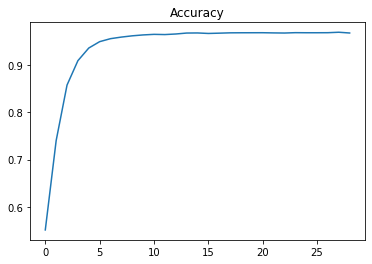

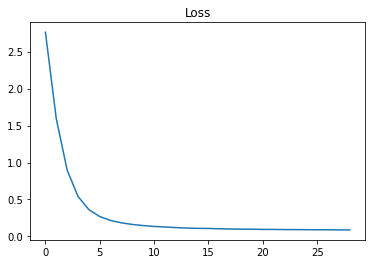

In [109]:
hist = history.history

plt.plot(hist['acc'])
plt.title("Accuracy")
plt.show()

plt.plot(hist['loss'])
plt.title("Loss")
plt.show()

### Extracting Features

In [110]:
features_layer = model.get_layer('features_layer')
features = features_layer.weights[0].numpy().T

In [111]:
features[:10]

array([[ 0.1997887 , -0.49804866, -0.01663878, ...,  0.54310703,
        -0.01606886,  0.5108184 ],
       [ 0.18301384, -0.12231464,  0.09539308, ...,  0.5799313 ,
         0.46067   ,  0.48925698],
       [ 0.13795783, -0.5943556 , -0.08793265, ..., -0.02297687,
         0.02405076,  0.5991488 ],
       ...,
       [ 0.48324463,  0.04540027, -0.17498879, ..., -0.1141738 ,
         0.08420511,  0.12621541],
       [ 0.14084224, -0.08824242,  0.25468296, ...,  0.00584372,
         0.64759666,  0.47371438],
       [ 0.21965937, -0.4567758 , -0.38281667, ...,  0.6137849 ,
         0.65227413,  0.53586435]], dtype=float32)

### Cosine Similarity

In [112]:
from sklearn.metrics.pairwise import cosine_similarity

In [113]:
with tf.device('/GPU:0'):
    sim = cosine_similarity(features)

In [114]:
sim.shape

(4980, 4980)

### Testing

In [115]:
def find_sim(word, recs, absolute=False):
	i = VOCAB.tolist().index(word)
	row = sim[i]
	if absolute:
		row = abs(row)
	recs_i = [i[0] for i in sorted(enumerate(row), key=lambda x:x[1], reverse=True)[1:recs+1]]
	return VOCAB[recs_i]

In [138]:
print(np.random.choice(VOCAB, 1000))

['armored' 'draft' 'apples' 'plus' 'growing' 'hobbers' 'health'
 'towerhouse' 'gouges' 'parties' 'moss' 'rip' 'seagard' 'rally' 'cur'
 'tangles' 'witty' 'fool' 'fieldhand' 'expect' 'wrinkled' 'treat'
 'claimed' 'crumbled' 'tully' 'singing' 'goods' 'jutted' 'stronger'
 'straining' 'daven' 'whit' 'brat' 'puzzle' 'bouncing' 'selyses' 'worked'
 'things' 'feel' 'leaving' 'leaderless' 'law' 'laid' 'lumpyface' 'truest'
 'sphinx' 'throat' 'guild' 'lannisters' 'stormy' 'jonos' 'galloping'
 'redandblue' 'tides' 'slashes' 'held' 'quaking' 'intact' 'wound' 'strand'
 'mantle' 'high' 'sail' 'unnatural' 'order' 'risk' 'theyre' 'haroooed'
 'aemon' 'views' 'apart' 'howl' 'nymeria' 'ashamed' 'inner' 'weeping'
 'rule' 'making' 'recalled' 'mewho' 'cage' 'river' 'ripply' 'waved'
 'desolate' 'dimness' 'longest' 'travel' 'harms' 'flinching' 'sleek'
 'graces' 'cripple' 'spurs' 'woke' 'difficulty' 'soul' 'squatted' 'deem'
 'pledge' 'boon' 'grace' 'replace' 'walder' 'bedecked' 'members' 'linger'
 'clothing' 'jo

In [135]:
find_sim("voices", 20, absolute=True)

array(['prying', 'beggar', 'conversation', 'vengeful', 'scuff',
       'crenellations', 'skinnier', 'stout', 'drunken', 'outriders',
       'mop', 'gasp', 'hellbitch', 'appearance', 'pat', 'featherbed',
       'eighty', 'squirrels', 'balding', 'flew'], dtype='<U15')

In [150]:
for _ in range(20):
    word = np.random.choice(VOCAB, 1)[0]
    recs = find_sim(word, 10, absolute=True)
    print(word + " -> " + ", ".join(recs))

poppy -> cow, ease, ablaze, phrase, circlet, growing, planks, apprentice, suggests, depend
carved -> pitted, neighbors, foeman, shaping, rough, pile, desmond, quivering, jowls, swathed
betrothed -> traps, matted, sickness, transport, granite, chiseling, carving, checked, flavored, curt
ninth -> axes, befitting, carving, throaty, dipping, grandmother, clubfoot, descent, chiseling, subterranean
raced -> soup, tasks, dipping, sane, forth, chiseling, carving, fourteen, descent, merchant
belched -> frowns, buried, wealth, counts, deeper, puzzle, unfurls, reports, gaped, throaty
yawned -> puffing, winced, stammered, miserably, itches, capering, squinted, glancing, chiseling, carving
hairy -> victims, scratch, whacked, alwaysbecause, tightness, oshas, screwed, matters, heartshaped, pushedin
thread -> seahorse, choker, burst, growing, favor, chiseling, copying, workers, carving, daggers
fed -> carving, chiseling, matted, grandmother, seats, noble, riddles, clubfoot, itll, harms
shelf -> maiden